In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


In [9]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1659928195725320717
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3182913126
locality {
  bus_id: 1
  links {
  }
}
incarnation: 16664522749415993190
physical_device_desc: "device: 0, name: GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [10]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [11]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(val, key) for (key, val) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [12]:
train_labels[0]

3

In [13]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [14]:
# two ways of one hot encoding
# 1 - use `from keras.utils.np_utils import to_categorical`
# 2 - use the following function
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [15]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [16]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [19]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 164us/step - loss: 2.5435 - acc: 0.5001 - val_loss: 1.7303 - val_acc: 0.5990
Epoch 2/20
7982/7982 [==============================] - 1s 119us/step - loss: 1.4526 - acc: 0.6852 - val_loss: 1.3539 - val_acc: 0.7180
Epoch 3/20
7982/7982 [==============================] - 1s 116us/step - loss: 1.1090 - acc: 0.7578 - val_loss: 1.1800 - val_acc: 0.7460
Epoch 4/20
7982/7982 [==============================] - 1s 113us/step - loss: 0.8795 - acc: 0.8120 - val_loss: 1.0560 - val_acc: 0.7700
Epoch 5/20
7982/7982 [==============================] - 1s 113us/step - loss: 0.7054 - acc: 0.8489 - val_loss: 0.9906 - val_acc: 0.7940
Epoch 6/20
7982/7982 [==============================] - 1s 116us/step - loss: 0.5650 - acc: 0.8809 - val_loss: 0.9310 - val_acc: 0.8100
Epoch 7/20
7982/7982 [==============================] - 1s 111us/step - loss: 0.4560 - acc: 0.9067 - val_loss: 0.9186 - val_acc: 0.7980


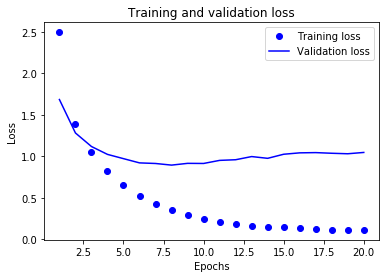

In [21]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

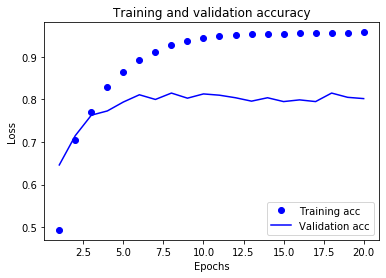

In [22]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [20]:
# train a new network from scratch for 9 epochs
model2 = models.Sequential()
model2.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(46, activation='softmax'))

model2.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [21]:
model2.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 169us/step - loss: 2.6134 - acc: 0.4640 - val_loss: 1.7288 - val_acc: 0.6350
Epoch 2/9
7982/7982 [==============================] - 1s 108us/step - loss: 1.4077 - acc: 0.7082 - val_loss: 1.2748 - val_acc: 0.7310
Epoch 3/9
7982/7982 [==============================] - 1s 113us/step - loss: 1.0429 - acc: 0.7784 - val_loss: 1.1030 - val_acc: 0.7650
Epoch 4/9
7982/7982 [==============================] - 1s 113us/step - loss: 0.8178 - acc: 0.8325 - val_loss: 1.0268 - val_acc: 0.7820
Epoch 5/9
7982/7982 [==============================] - 1s 116us/step - loss: 0.6504 - acc: 0.8628 - val_loss: 0.9519 - val_acc: 0.8060
Epoch 6/9
7982/7982 [==============================] - 1s 115us/step - loss: 0.5290 - acc: 0.8900 - val_loss: 0.9197 - val_acc: 0.8110
Epoch 7/9
7982/7982 [==============================] - 1s 113us/step - loss: 0.4202 - acc: 0.9112 - val_loss: 0.8997 - val_acc: 0.8150
Epoch 8

In [30]:
results = model2.evaluate(x_test, one_hot_test_labels)
results

2246/2246 [==============================] - 0s 112us/step


[0.9793039631440187, 0.7902938556904678]

In [31]:
# a random accuracy baseline
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.182546749777382

In [32]:
predictions = model.predict(x_test)

In [33]:
predictions[0].shape

(46,)

In [34]:
np.sum(predictions[0])

1.0

In [35]:
np.argmax(predictions[0])

3

In [36]:
# another way to encode the labels
# cast them as integer tensors

y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [38]:
# with integer labels, choice of loss function changes to...
# `loss = sparse_categorical_crossentropy`